# Data analysis

In [1]:
# standard data science tools
import pandas as pd
import numpy as np

# graph standard libraries
import networkx as nx

# quick and dirty ploting
import matplotlib.pyplot as plt

In [2]:
# adjecency matrix
A = pd.read_csv("./data/counters_adjacency_mtx.csv").drop("Unnamed: 0", axis = 1).to_numpy()

# prob. don't need to differentiate between predecessors/successor thats just a DAG
A[A == 2] = 1

display(A)

# node features
# TODO: read node features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

# Graph statistics

n = 463
unconnected nodes: 12
Components = [438, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
dmax = 41


'\nNevermind, we definitely wont have 41 layers :/\n'

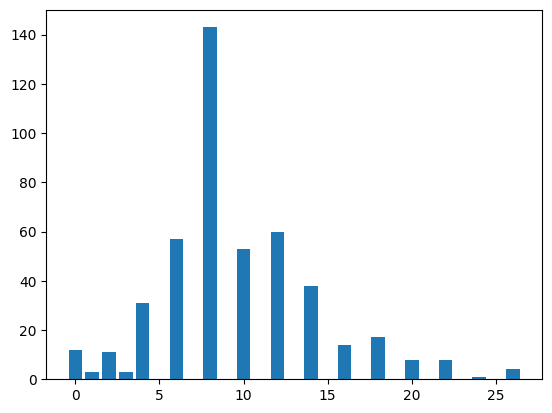

In [3]:
# initialize graph
G = nx.DiGraph(A)

## simple calculations (wont take to long)

# number of nodes
n = len(G)
print(f'n = {n}')

# degree distribution
dist = nx.degree_histogram(G)
print(f'unconnected nodes: {dist[0]}')

plt.bar(np.arange(len(dist)), dist)

'''
Nule pomenijo da node-i nimajo povezav (no reason to do a GNN but we can maybe use them anyway just the GNN part won't
do anything). 
Cudno je da so povezave v adjecency, kjer imamo > 2 povezave, tole verjetno samo ne razumem.
Hmm, une s 4-imi povezavami so najbolj pogosto, mogoce je to zarad tega ker imamo dva merilca. In potem dva nazaj dva
naprej in 8 jih je ce imas prikljucke/izkljucke in uni kjer je vec so tisti, kjer je vec prikljuckov izkljuckov.
'''

# graph sparesely connected
dens = nx.density(G)

# DAG - but adjecency mtx is symmetrix
is_not_symmetric = nx.is_directed(G)

# not all nodes strongly connected, i.e. we end up in a certain graph part we can't get any info out (not sure if this is a problem for GNN)
strongs = sorted(nx.strongly_connected_components(G), key=len, reverse=True)
strongs_len = [len(g) for g in strongs]
print(f'Components = {strongs_len}')

'''
Clearly not that big of a problem (26 unconnected nodes) we either remove or somehow make connected -
maybe doesnt even matter for GNN (12 of them are weird + 14 might be prikljucki/izhodi iz AC/HC)
'''

# take largest strongly connected subgraph
G0 = G.subgraph(strongs[0])

# diameter - useful for deciding how many layers we want (diameter = n-layers)
d = nx.approximation.diameter(G0)
print(f'dmax = {d}')

'''
Nevermind, we definitely wont have 41 layers :/
'''

## complex calculation that take long (split so you don't have to run everything)

Apparently DAG not strongly connected.

In [5]:
np.sort(np.sum(A, axis = 1))

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4

In [ ]:
np.sort(np.sum(A, axis = 0))